In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from scipy import optimize

import csv

import time

# Univariate Logistic Regression

In [2]:
pathToDataFile = 'ex2data1.txt'

# 1 Data Visualisation

In [3]:
dataFrame = pd.read_csv(pathToDataFile, header = None, names = ['x1', 'x2', 'y'])
sampleSize, numVariables = dataFrame.shape
print(dataFrame.head())
print ("sampleSize =", sampleSize, "numVariables =", numVariables)

          x1         x2  y
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
sampleSize = 100 numVariables = 3


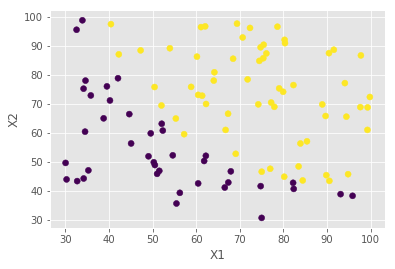

In [4]:
x1 = dataFrame['x1']
x2 = dataFrame['x2']
colour = dataFrame['y']
plt.scatter(x1, x2, c = colour)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# 2 Loading Data

In [ ]:
def getData(pathToDataFile):
#     try wiht matrices as well
    data = np.loadtxt(pathToDataFile, delimiter = ',')
    sampleSize, numVariables = data.shape
    X = np.insert(data[:, :-1], 0, 1, axis=1)
    y = data[:, -1:]
#     beta = np.matrix(np.zeros(numVariables)).T
    beta = np.zeros((numVariables,1))
    return beta, X, y

In [ ]:


def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoidHypothesis(betas, Xs):
    return sigmoid(np.dot(Xs, betas))

# def sigmoidCostFunction(Xs, Ys, betas):
def sigmoidCostFunction(betas, Xs, Ys, iLambda = 0.):
    sampleSize, numVariables = Xs.shape
    Hs = sigmoidHypothesis(betas, Xs)
#     cost = -np.sum(np.multiply(Ys, np.log(Hs)) + np.multiply((1-Ys), np.log(1-Hs)))/sampleSize
#     cost = -np.sum(np.dot(Ys.T, np.log(Hs)) + np.dot((1-Ys).T, np.log(1-Hs)))/sampleSize
    cost = (- np.dot(Ys.T, np.log(Hs)) - np.dot((1-Ys).T, np.log(1-Hs)))/sampleSize
#     regularisation term (R)
    R = iLambda*np.dot(betas[1:].T,betas[1:])/(2*sampleSize)
    return cost + R
#     return (cost.item(0))

def optimisation (betas, Xs, Ys, iLambda=0.):
    return optimize.fmin(sigmoidCostFunction, x0=betas, args=(Xs, Ys, iLambda), maxiter=1500, full_output=True)

def plotRegression(Xs, Ys, betas):
    X_1s = Xs[:, 1:2]
    X_2s = Xs[:, 2:]
    colour = Ys[:, 0:]
    plt.scatter(X_1s, X_2s, c = colour)

    fitX_2s = - betasFit[0]/betasFit[2] - X_1s*betasFit[1]/betasFit[2]
    plt.plot(X_1s, fitX_2s, '-')
    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.show()
    
def estimate(betas, Xs):
    return sigmoidHypothesis(betas, Xs) >= 0.5

# add function to calculate the percentage of correct predictions

def precisionANDrecal(betasFit, Xs, Ys):
    #Divide the sample into two: ones with positive classification, one with null classification
    positives = np.array([Xs[i] for i in range(Xs.shape[0]) if Ys[i] == 1])
    negatives = np.array([Xs[i] for i in range(Xs.shape[0]) if Ys[i] == 0])
    #Check to make sure I included all entries
    # print ("Included everything? ", (len(positives)+len(negatives) == Xs.shape[0]))
    truePositives =  np.sum(estimate(betasFit, positives))
    falsePositives = np.sum(estimate(betasFit, negatives))
    falseNegatives = positives.shape[0] - np.sum(estimate(betasFit, positives))
    precision  = truePositives/(truePositives+falsePositives)
    recall  = truePositives/(truePositives+falseNegatives)
    correctPredictions = (Xs.shape[0] - falsePositives - falseNegatives)/Xs.shape[0]
    return print('Precision =', precision, '\n', 'Recall =', recall, '\n', 'Correct Predictions', correctPredictions)
    

In [ ]:
Xs, Ys, betas = getData(pathToDataFile)
# iLambda = 0
betasFit = optimisation(betas, Xs, Ys)[0]

In [ ]:
precisionANDrecal(betasFit, Xs, Ys)

http://www.johnwittenauer.net/tag/machine-learning/

http://aimotion.blogspot.se/2011/11/machine-learning-with-python-logistic.html

https://beckernick.github.io/logistic-regression-from-scratch/

https://github.com/kaleko/CourseraML/blob/master/ex2/ex2.ipynb

http://www.scipy-lectures.org/advanced/mathematical_optimization/

# Data Set II

## 1.1 Data Visualisation

In [ ]:
pathToDataFile_2 = 'ex2data2.txt'
dF_2 = pd.read_csv(pathToDataFile_2, header = None)
sampleSize, numVariables = dF_2.shape
print ('sampleSize =', sampleSize, 'numVariables =', numVariables)
print (dF_2.head())

In [ ]:
X_1s = dF_2.iloc[:, :1]
X_2s = dF_2.iloc[:, 1:2]
colour = dF_2.iloc[:, 2:]
plt.scatter(X_1s, X_2s, c = colour)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Fairly symple way to generate polynomial and interaction features<br\>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def dataPreprocessing(pathToDataFile, polynomialDegree):
#     try wiht matrices as well
    data = np.loadtxt(pathToDataFile, delimiter = ',')
    sampleSize, numVariables = data.shape
    X = data[:, :-1]
    y = data[:, -1:]
    poly = PolynomialFeatures(polynomialDegree)
    polyX = poly.fit_transform(X)
    sampleSize, numVariables = polyX.shape
    betas = np.zeros((numVariables,1))
    return betas, polyX, y

In [ ]:
betas_2, X_2, y_2 = dataPreprocessing(pathToDataFile_2, 6)
sigmoidCostFunction(betas_2, X_2, y_2, iLambda = 0.)

In [ ]:
optimisation(betas_2, X_2, y_2, iLambda = 0.)
optimisation(betas_2, X_2, y_2, iLambda = 0.)[0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_1s = np.linspace(-1.0, 1.5, 100)
X_2s = np.linspace(-1.0, 1.5, 100)
Ys = np.zeros((len(X_1s),len(X_2s)))
for i in range(len(X_1s)):
    for j in xrange(len(X_2s)):
        myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
        zvals[i][j] = np.dot(theta,myfeaturesij.T)
zvals = zvals.transpose()

X, Y = np.meshgrid(x,y)
F =  X**2 + 0.01*X**4 + Y**2 - Y - 0.6
plt.contour(X,Y,F,[0])
plt.show()

In [ ]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in xrange(len(xvals)):
        for j in xrange(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

In [ ]:
np.linspace(-1.0, 1.5, 100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1.0, 1.0, 10)
y = np.linspace(-1.0, 1.0, 10)
X, Y = np.meshgrid(x,y)
X.shape